In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c brain-motor-imagery-classification

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          18917        412  1.0              
ashishkumarak/netflix-reviews-playstore-daily-updated           Netflix Reviews [DAILY UPDATED]                   12MB  2024-05-15 23:27:44           1098         31  1.0              
sahirmaharajj/school-student-daily-attendance                   School Student Daily Attendance                    2MB  2024-04-29 19:29:56           4484         93  1.0              
sahirmaharajj/college-exam-results-sat                          College Exa

In [2]:
pip install braindecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.2/165.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_

In [5]:
!unzip /content/brain-motor-imagery-classification.zip

Archive:  /content/brain-motor-imagery-classification.zip
  inflating: sample_submission.csv   
  inflating: test/00edaaa8-102d-4ee3-b531-0be67dcbd9e6.npy  
  inflating: test/01b63df8-05f9-4956-87f4-949ed9ae4dd6.npy  
  inflating: test/01bfd881-7850-49f1-ad32-ff9ae51e3e3f.npy  
  inflating: test/01d9002f-b086-4635-bf74-5316ceda3098.npy  
  inflating: test/028522a4-5332-4e84-b578-ce45ed5e4899.npy  
  inflating: test/0368a7cc-d6c6-416d-878e-edbcd562f317.npy  
  inflating: test/044841bc-050d-4c9f-92db-1ff1a7f306cb.npy  
  inflating: test/051581bf-c779-4d9c-86e9-324404b149ca.npy  
  inflating: test/06360991-5140-41a1-889f-3cb10b2241d0.npy  
  inflating: test/066dc317-8b3c-431e-b5d9-894abe3a4857.npy  
  inflating: test/06e9b7ab-0ee9-47a3-a500-a8dab4ee097f.npy  
  inflating: test/06f9ab25-f9b7-4a12-82f3-a3c92adcc645.npy  
  inflating: test/072dc9a9-7bfa-4da9-83d7-23b2ed5818e0.npy  
  inflating: test/075e9017-dace-441d-acbd-dd929c1a06f7.npy  
  inflating: test/0783e1ea-375e-4239-be7d-12177a54

<hr>

In [2]:
from scipy.signal import butter, filtfilt, iirnotch, freqz
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Band-pass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Notch filter
def notch_filter(data, cut_freq, fs, Q=30):
    nyq = 0.5 * fs
    freq = cut_freq / nyq
    b, a = iirnotch(freq, Q)
    y = filtfilt(b, a, data)
    return y

def filter03050(Ipsignal):
    sampling_rate = 250  # Hz
    # fft_signal = np.fft.fft(Ipsignal)
    # frequencies = np.fft.fftfreq(len(Ipsignal), 1/sampling_rate)
    filtered_signal = bandpass_filter(Ipsignal, 1, 30, sampling_rate)          # band-pass filter 0-30 Hz
    filtered_signal = notch_filter(filtered_signal, 50, sampling_rate)       # notch filter 50 Hz
    return filtered_signal

def unique_name(Datapath):
    all_name = os.listdir(Datapath)
    new = []
    for un in all_name:
        i = un.replace("_data_time_series.npy","").replace("_data_time_stamps.npy","").replace("_label_time_series.npy","").replace("_label_time_stamps.npy","")
        new.append(i)
        unique_name = list(set(new))
    return unique_name

def check_different_duration(label_time_stamps):
    keep_time = []
    start_time = 0
    for current_time in list(label_time_stamps):
        keep_time.append(current_time-start_time)
        start_time = current_time
    keep_time = keep_time[1:]
    avgtime = sum(keep_time)/len(keep_time)
    stat = True
    for etime in keep_time:
        if 6.8 <= etime <= 7.5:
            stat = True
        else:
            stat = False
            break
    return stat,avgtime

file_path = "/content/train/train"
unique_name = unique_name(file_path)

In [4]:
unique_name.remove("s1_d2_p002_003")          # sameple ห่าง
unique_name.remove("s1_d2_p006_008")          # label != 30
unique_name.remove("s2_d2_p002_006")          # label != 30

In [5]:
def filter_one(windows,percent_pass):
    percentage_ones = (np.sum(windows==1)/len(windows))
    if percentage_ones >= percent_pass:
        return True
    return False

In [6]:
data_dataset  = []
label_dataset = []
for name in unique_name:
    # print(name)
    signals_series    = np.load(os.path.join(file_path,name+"_data_time_series.npy"))
    times             = np.load(os.path.join(file_path,name+"_data_time_stamps.npy"))
    label_time_series = np.load(os.path.join(file_path,name+"_label_time_series.npy"))
    label_time_stamps = np.load(os.path.join(file_path,name+"_label_time_stamps.npy"))
    signals = signals_series[:,:5]
    windows = signals_series[:,16]
    if not(filter_one(windows,1)):            # กรอง คุณภาพ 0,1
        continue
    stat,avgtime = check_different_duration(label_time_stamps)
    if not(stat):                               # กรอง ระยะห่างของ time_stamp
        continue
    if filter!=None:                            # Apply filter
        filtered_signal = []
        Dim = signals.shape[1]
        # print(Dim)
        for i in range(Dim):
            # print(f"{i} : {signals[:,i]}")
            filtered_signal.append(filter03050(signals[:,i]))
        signals = np.array(filtered_signal).T
    # sample_point = int(round(avgtime))
    # datapoint = 250 * sample_point                   # 250 Hz * 7 s
    for index in range(30):
        # start_point = index * datapoint
        # end_point = (index + 1) * datapoint
        # if end_point <= signals.shape[0]:  # Check to ensure slice is within the data range
        #     data_dataset.append(signals[start_point:end_point])
        # else:
        #     break
        sn = signals[1750*i:1750*(i+1)]
        if sn.shape[0]!=30 and sn.shape[1]!=5:
            print(name,"error")
        data_dataset.append(sn)
    label_dataset.append(label_time_series)
data_dataset = np.stack(data_dataset)

label_dataset = np.concatenate(label_dataset)
label_dataset = label_dataset.flatten().tolist()

In [7]:
# Demension check
data_dataset.shape

(1530, 1750, 5)

In [8]:
label_dataset = np.array(label_dataset)
label_dataset

array([120, 110, 150, ..., 150, 120, 110])

In [9]:
label_dataset.shape

(1530,)

<hr>

In [10]:
from braindecode.models.util import models_dict
print(f'All the Braindecode models:\n{list(models_dict.keys())}')

All the Braindecode models:
['ATCNet', 'Deep4Net', 'DeepSleepNet', 'EEGConformer', 'EEGITNet', 'EEGInception', 'EEGInceptionERP', 'EEGInceptionMI', 'EEGNetv1', 'EEGNetv4', 'EEGResNet', 'HybridNet', 'ShallowFBCSPNet', 'SleepStagerBlanco2020', 'SleepStagerChambon2018', 'SleepStagerEldele2021', 'TCN', 'TIDNet', 'USleep']


In [11]:
from braindecode.models import ShallowFBCSPNet              # Import the model from braindecode * There are many model that available
import mne
import numpy as np

In [12]:
# Train spect config
model = ShallowFBCSPNet(
    n_chans   = 5,
    n_times   = 1750,
    n_outputs = 3,
    final_conv_length='auto',
)
print(model)

Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
ShallowFBCSPNet (ShallowFBCSPNet)        [1, 5, 1750]              [1, 3]                    --                        --
├─Ensure4d (ensuredims): 1-1             [1, 5, 1750]              [1, 5, 1750, 1]           --                        --
├─Rearrange (dimshuffle): 1-2            [1, 5, 1750, 1]           [1, 1, 1750, 5]           --                        --
├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1750, 5]           [1, 40, 1726, 1]          9,040                     --
├─BatchNorm2d (bnorm): 1-4               [1, 40, 1726, 1]          [1, 40, 1726, 1]          80                        --
├─Expression (conv_nonlin_exp): 1-5      [1, 40, 1726, 1]          [1, 40, 1726, 1]          --                        --
├─AvgPool2d (pool): 1-6                  [1, 40, 1726, 1]          [1, 40, 111, 1]           --                        [75, 1]
├─Express

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


In [13]:
data_dataset.shape

(1530, 1750, 5)

In [14]:
data_dataset = data_dataset.reshape(data_dataset.shape[0], 5, 1750)
data_dataset.shape

(1530, 5, 1750)

In [15]:
label_dataset.shape

(1530,)

In [16]:
label_dataset = np.array(label_dataset)
label_dataset

array([120, 110, 150, ..., 150, 120, 110])

In [17]:
# Map value
mapping = {110: 0,
           120: 1,
           150: 2}

mapped_label = np.vectorize(mapping.get)(label_dataset)
label = np.array(mapped_label)
label

array([1, 0, 2, ..., 2, 1, 0])

In [18]:
info = mne.create_info(
    ch_names = ['c1','c2','c3','c4','c5'], sfreq=250., ch_types="eeg"
)
# data_dataset  # 100 epochs, 8 channels, 7 seconds (@250Hz)
epochs = mne.EpochsArray(data_dataset, info=info)


Not setting metadata
1530 matching events found
No baseline correction applied
0 projection items activated


In [19]:
from skorch.dataset import ValidSplit
from braindecode import EEGClassifier

In [23]:
net = EEGClassifier(
    'ShallowFBCSPNet',
    module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
    # To train a neural network you need validation split, here, we use 20%.
)
# Train model
net.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        6.7640       0.3235        4.7398  15.3217
      2        4.2111       0.3235        2.4192  15.1213
      3        2.9305       0.2974        2.2905  15.0196
      4        2.6195       0.2908        1.7807  15.0011
      5        2.3327       0.2614        3.4542  28.5895
      6        2.4052       0.2680        1.4571  16.4781
      7        2.0668       0.3268        2.0932  15.0032
      8        2.5919       0.3072        1.6657  15.1022
      9        2.3794       0.2974        2.3470  15.4133
     10        2.0576       0.2745        1.4742  17.3239
     11        1.9613       0.3105        1.9274  16.4306
     12        1.9636       0.3072        2.4234  30.5562
     13        1.9627       0.2974        1.6294  14.9404
     14        2.0023       0.3007        1.8656  15.1306
     15        2.0523       0.2647        1.5418  15.1914


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  ShallowFBCSPNet (ShallowFBCSPNet)        [1, 5, 1750]              [1, 3]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 5, 1750]              [1, 5, 1750, 1]           --                        --
  ├─Rearrange (dimshuffle): 1-2            [1, 5, 1750, 1]           [1, 1, 1750, 5]           --                        --
  ├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1750, 5]           [1, 40, 1726, 1]          9,040                     --
  ├─BatchNorm2d (bnorm): 1-4               [1, 40, 1726, 1]          [1, 40, 1726, 1]          80                        --
  ├─Expression (conv_nonlin_exp): 

In [43]:
net1 = EEGClassifier(
    'Deep4Net',
    module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
    # To train a neural network you need validation split, here, we use 20%.
)
# Train model
net1.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        2.9541       0.3431        1.2913  26.5303
      2        2.1337       0.2941        1.1609  21.9348
      3        1.7587       0.3137        1.1445  20.6094
      4        1.6359       0.3170        1.1762  21.6643
      5        1.7629       0.3007        1.3190  20.6903
      6        1.3906       0.3137        1.1954  28.9239
      7        1.5549       0.3595        1.1926  21.8688
      8        1.4105       0.2778        1.2708  20.8432
      9        1.5086       0.2876        1.3150  21.5460
     10        1.5624       0.3431        1.1817  21.5096
     11        1.5288       0.2418        1.1416  20.9823
     12        1.3508       0.2843        1.1654  21.9049
     13        1.5059       0.3399        1.1567  20.7736
     14        1.4993       0.2908        1.4001  21.7809
     15        1.3684       0.3268        1.1871  20.4903


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  Deep4Net (Deep4Net)                      [1, 5, 1750]              [1, 3]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 5, 1750]              [1, 5, 1750, 1]           --                        --
  ├─Rearrange (dimshuffle): 1-2            [1, 5, 1750, 1]           [1, 1, 1750, 5]           --                        --
  ├─CombinedConv (conv_time_spat): 1-3     [1, 1, 1750, 5]           [1, 25, 1741, 1]          3,400                     --
  ├─BatchNorm2d (bnorm): 1-4               [1, 25, 1741, 1]          [1, 25, 1741, 1]          50                        --
  ├─Expression (conv_nonlin): 1-5 

In [49]:
net2 = EEGClassifier(
    'EEGITNet',
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
    # To train a neural network you need validation split, here, we use 20%.
)
# Train model
net2.fit(epochs, label)

  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.1511       0.3072        1.1090  10.7121
      2        1.1512       0.2941        1.1189  9.5987
      3        1.1294       0.2843        1.1232  10.8107
      4        1.1299       0.2680        1.1282  12.4721
      5        1.1224       0.2451        1.1292  10.1561
      6        1.1391       0.2320        1.1385  9.2199
      7        1.1309       0.2386        1.1400  12.3895
      8        1.1317       0.2320        1.1566  10.1941
      9        1.1277       0.2255        1.1383  10.2522
     10        1.1320       0.2092        1.1473  9.2495
     11        1.1280       0.2026        1.1525  10.0383
     12        1.1369       0.2026        1.1594  10.0736
     13        1.1258       0.1797        1.1483  9.0005
     14        1.1260       0.1961        1.1480  10.0620
     15        1.1317       0.1993        1.1529  10.9116


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGITNet (EEGITNet)                                [1, 5, 1750]              [1, 3]                    --                        --
  ├─Sequential (input_preprocess): 1-1               [1, 5, 1750]              [1, 1, 5, 1750]           --                        --
  │    └─Ensure4d (0): 2-1                           [1, 5, 1750]              [1, 5, 1750, 1]           --                        --
  │    └─Rearrange (1): 2-2                          [1, 5, 1750, 1]           [1, 1, 5, 1750]           --                        --
  ├─_InceptionBlock (inception_block): 1-2           [1, 1, 5, 1750]           [1, 14, 1, 1750]   

In [50]:
net3 = EEGClassifier(
    'EEGInception',
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
)
# Train model
net2.fit(epochs, label)

Re-initializing module because the following parameters were re-set: chs_info, n_outputs, n_times, sfreq.
Re-initializing criterion.
Re-initializing optimizer.


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.1493       0.2941        1.1107  12.8898
      2        1.1284       0.2974        1.1178  16.1008
      3        1.1353       0.2614        1.1202  10.7025
      4        1.1180       0.3072        1.1275  12.2985
      5        1.1276       0.2908        1.1346  9.7183
      6        1.1193       0.2745        1.1344  11.1071
      7        1.1310       0.2418        1.1370  10.2925
      8        1.1108       0.2386        1.1342  10.9133
      9        1.1244       0.2026        1.1373  9.1482
     10        1.1290       0.2288        1.1440  11.2574
     11        1.1249       0.2451        1.1499  11.6841
     12        1.1382       0.2026        1.1447  10.1370
     13        1.1143       0.1993        1.1480  9.8191
     14        1.1202       0.2222        1.1520  10.5303
     15        1.1266       0.1830        1.1585  11.0211


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGITNet (EEGITNet)                                [1, 5, 1750]              [1, 3]                    --                        --
  ├─Sequential (input_preprocess): 1-1               [1, 5, 1750]              [1, 1, 5, 1750]           --                        --
  │    └─Ensure4d (0): 2-1                           [1, 5, 1750]              [1, 5, 1750, 1]           --                        --
  │    └─Rearrange (1): 2-2                          [1, 5, 1750, 1]           [1, 1, 5, 1750]           --                        --
  ├─_InceptionBlock (inception_block): 1-2           [1, 1, 5, 1750]           [1, 14, 1, 1750]   

In [20]:
net4 = EEGClassifier(
    'EEGInceptionERP',
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
)
# Train model
net4.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1040.)
  return F.conv2d(input, weight, bias, self.stride,


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.5091       0.3301        1.1397  43.9251
      2        1.4954       0.3268        1.1345  29.6463
      3        1.4186       0.3072        1.1465  29.7404
      4        1.3737       0.2876        1.1414  29.8566
      5        1.3348       0.2810        1.1399  29.2867
      6        1.3693       0.3105        1.1466  30.2186
      7        1.3240       0.3170        1.1516  28.0134
      8        1.3258       0.3039        1.1525  28.3555
      9        1.2678       0.2876        1.1479  28.6186
     10        1.2343       0.2810        1.1544  29.6631
     11        1.2881       0.2712        1.1593  29.7965
     12        1.2238       0.2810        1.1628  28.7558
     13        1.2573       0.2712        1.1603  28.8551
     14        1.1942       0.2680        1.1561  29.3421
     15        1.2181       0.2582        1.1551  29.3424


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=======================================================================================================================================================
  Layer (type (var_name):depth-idx)                  Input Shape               Output Shape              Param #                   Kernel Shape
  EEGInceptionERP (EEGInceptionERP)                  [1, 5, 1750]              [1, 3]                    --                        --
  ├─Sequential (final_block): 1-23                   --                        --                        (recursive)               --
  │    └─ELU (7): 2-1                                [1, 5, 1750]              [1, 5, 1750]              --                        --
  ├─Ensure4d (ensuredims): 1-2                       [1, 5, 1750]              [1, 5, 1750, 1]           --                        --
  ├─Rearrange (dimshuffle): 1-3                      [1, 5, 1750, 1]           [1, 1, 5, 1750]    

In [22]:
net5 = EEGClassifier(
    'EEGNetv1',
    # module__final_conv_length='auto',
    max_epochs=15,
    train_split=ValidSplit(0.2),
)
# Train model
net5.fit(epochs, label)

/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        3.6172       0.3170        2.7759  23.0581
      2        1.6376       0.3529        2.8830  15.3577
      3        1.4202       0.2778        1.2272  15.3643
      4        1.3292       0.3137        1.7006  15.3872
      5        1.3731       0.3105        1.2671  16.1428
      6        1.3404       0.3039        1.3334  15.8201
      7        1.2342       0.2908        1.1888  15.4418
      8        1.3423       0.3105        1.2597  15.3763
      9        1.2390       0.3301        1.3349  15.3627
     10        1.2211       0.2484        1.1727  15.3196
     11        1.1952       0.2680        1.3198  15.3464
     12        1.2267       0.2680        1.1716  15.5661
     13        1.1869       0.2582        1.1407  16.6896
     14        1.1982       0.2712        1.1749  16.4389
     15        1.1970       0.2516        1.1604  15.2757


<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=============================================================================================================================================
  Layer (type (var_name):depth-idx)        Input Shape               Output Shape              Param #                   Kernel Shape
  EEGNetv1 (EEGNetv1)                      [1, 5, 1750]              [1, 3]                    --                        --
  ├─Ensure4d (ensuredims): 1-1             [1, 5, 1750]              [1, 5, 1750, 1]           --                        --
  ├─Conv2d (conv_1): 1-2                   [1, 5, 1750, 1]           [1, 16, 1750, 1]          96                        [1, 1]
  ├─BatchNorm2d (bnorm_1): 1-3             [1, 16, 1750, 1]          [1, 16, 1750, 1]          32                        --
  ├─Expression (elu_1): 1-4                [1, 16, 1750, 1]          [1, 16, 1750, 1]          --                        --
  ├─Expression (permute_1): 1-

<hr>

<h1>Test model</h1>

In [24]:
from scipy.signal import butter, filtfilt, iirnotch, freqz
import os

In [25]:
data_dataset  = []
label_dataset = []
file_path = "/content/train/train"
unique_name = ["s1_d2_p002_002"]
for name in unique_name:
    print(name)
    signals           = np.load(os.path.join(file_path,name+"_data_time_series.npy"))
    times             = np.load(os.path.join(file_path,name+"_data_time_stamps.npy"))
    label_time_series = np.load(os.path.join(file_path,name+"_label_time_series.npy"))
    label_time_stamps = np.load(os.path.join(file_path,name+"_label_time_stamps.npy"))
    signals = signals[:,:5]
    print(signals.shape)
    stat,avgtime = check_different_duration(label_time_stamps)
    if not(stat):
        continue
    # print("Avg time",self.avgtime)
    if filter!=None:
        filtered_signal = []
        Dim = signals.shape[1]
        print(Dim)
        for i in range(Dim):
            # print(f"{i} : {signals[:,i]}")
            filtered_signal.append(filter03050(signals[:,i]))
        signals = np.array(filtered_signal).T
    sample_point = int(round(avgtime))
    datapoint = 250 * sample_point                   # 250 Hz * 7 s
    for index in range(30):
        start_point = index * datapoint
        end_point = (index + 1) * datapoint
        if end_point <= signals.shape[0]:  # Check to ensure slice is within the data range
            data_dataset.append(signals[start_point:end_point])
        else:
            break
    label_dataset.append(label_time_series)
data_dataset = np.stack(data_dataset)
print(data_dataset.shape)
label_dataset = np.concatenate(label_dataset)
label_dataset = label_dataset.flatten().tolist()

s1_d2_p002_002
(53714, 5)
5
(30, 1750, 5)


In [26]:
data_dataset = data_dataset.reshape(30,5,1750)
data_dataset.shape

(30, 5, 1750)

In [27]:
test_epochs = mne.EpochsArray(data_dataset,info=info)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


In [28]:
# Get predictions from the trained model
predictions = net.predict(test_epochs)
probabilities = net.predict_proba(test_epochs)

In [29]:
# Map value
mapping = {110: 0, 120: 1, 150: 2}

mapped_label = np.vectorize(mapping.get)(label_dataset)
print(mapped_label)

[1 0 2 2 1 0 1 0 2 2 1 0 1 2 0 2 1 0 1 0 2 2 1 0 2 1 0 2 1 0]


In [30]:
print("Predictions:", predictions)
print("Probabilities:", probabilities)

Predictions: [2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0]
Probabilities: [[4.41729814e-01 4.75822962e-05 5.58222592e-01]
 [8.17767560e-01 1.82752541e-04 1.82049662e-01]
 [9.71814618e-02 4.66094865e-03 8.98157597e-01]
 [5.38423717e-01 2.60068118e-05 4.61550236e-01]
 [2.93545604e-01 1.46617749e-04 7.06307828e-01]
 [9.81882811e-01 6.37152243e-06 1.81108806e-02]
 [5.72531402e-01 2.95995469e-05 4.27438915e-01]
 [6.45401895e-01 4.99278467e-05 3.54548156e-01]
 [9.56214070e-01 8.68701100e-05 4.36990596e-02]
 [9.26192820e-01 2.53478065e-05 7.37818331e-02]
 [9.19418097e-01 3.17372110e-06 8.05786923e-02]
 [5.06842732e-01 2.73713831e-05 4.93129939e-01]
 [8.83091331e-01 1.88018821e-05 1.16889797e-01]
 [9.32138681e-01 3.24091488e-05 6.78288415e-02]
 [9.78268564e-01 1.40110105e-05 2.17174292e-02]
 [9.58977401e-01 5.19919877e-06 4.10174392e-02]
 [5.50383806e-01 5.69992517e-05 4.49559212e-01]
 [8.30076337e-01 1.01850113e-04 1.69821829e-01]
 [8.66820991e-01 5.48182943e-05 1.33124128e-01

In [31]:
Cm = 0
for i,j in zip(mapped_label,predictions):
    print(i,j,i==j)
    if i==j:
        Cm+=1
print(f"{Cm}/{len(predictions)}")

1 2 False
0 0 True
2 2 True
2 0 False
1 2 False
0 0 True
1 0 False
0 0 True
2 0 False
2 0 False
1 0 False
0 0 True
1 0 False
2 0 False
0 0 True
2 0 False
1 0 False
0 0 True
1 0 False
0 2 False
2 2 True
2 0 False
1 0 False
0 0 True
2 0 False
1 0 False
0 2 False
2 2 True
1 0 False
0 0 True
11/30


<hr>

<h1>Prediction</h1>

In [32]:
import pandas as pd

In [33]:
sample_submission = pd.read_csv("/content/sample_submission.csv")
sample_submission

,id,predict
0,a0dfb1f6-a76b-404f-a04a-b61e955ce1ef,110.0
1,51afd110-7556-4a7d-b6d2-68e46256f267,150.0
2,eb229854-1a14-4e1f-8e52-470edbec47c9,150.0
3,8fa74efe-f269-415e-a968-1a92e7c66fe6,NaN
4,7b209881-a1dd-4aa3-a06a-037908b07bfa,NaN
...,...,...
475,69e84db3-0019-4e38-90fc-968f45747a16,NaN
476,d18d7d80-78fa-402a-ba1c-e35d72382b18,NaN
477,0a532391-dd42-413f-ab15-798960de95d6,NaN
478,0c02ad4f-de15-48cb-ad31-0925e69bfe97,NaN


In [34]:
test_file_path = '/content/test'
for ss in sample_submission["id"][3:]:
    file_name = os.path.join(test_file_path,ss+".npy")
    signals   = np.load(file_name)[:,:5]
    filtered_signal = []
    Dim = signals.shape[1]
    for i in range(Dim):
        filtered_signal.append(filter03050(signals[:,i]))
    signals = np.array(filtered_signal).T
    signals_reshape = signals.T.reshape(1, 5, signals.shape[0])

    test_epochs = mne.EpochsArray(signals_reshape,info=info)
    predictions = net.predict(test_epochs)
    sample_submission.loc[sample_submission['id'] == ss, 'predict'] = predictions[0]

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baselin

In [35]:
sample_submission['predict'] = sample_submission['predict'].apply(lambda ip: "110" if ip == 0 else "120" if ip == 1 else "150" if ip == 2 else str(int(ip)))

In [36]:
sample_submission

,id,predict
0,a0dfb1f6-a76b-404f-a04a-b61e955ce1ef,110
1,51afd110-7556-4a7d-b6d2-68e46256f267,150
2,eb229854-1a14-4e1f-8e52-470edbec47c9,150
3,8fa74efe-f269-415e-a968-1a92e7c66fe6,110
4,7b209881-a1dd-4aa3-a06a-037908b07bfa,110
...,...,...
475,69e84db3-0019-4e38-90fc-968f45747a16,110
476,d18d7d80-78fa-402a-ba1c-e35d72382b18,110
477,0a532391-dd42-413f-ab15-798960de95d6,150
478,0c02ad4f-de15-48cb-ad31-0925e69bfe97,110


In [37]:
i110 = 0
i120 = 0
i150 = 0
for item in list(sample_submission['predict']):
    if item == '110':
        i110+=1
    elif item == '120':
        i120+=1
    elif item == '150':
        i150+=1

In [38]:
import matplotlib.pyplot as plt

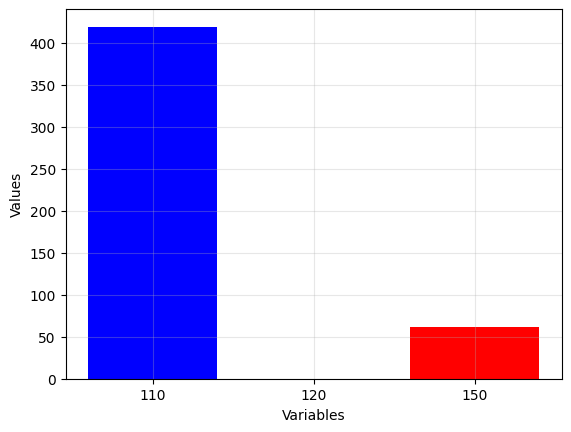

In [39]:
# Labels and values for the bar plot
labels = ['110', '120', '150']
values = [i110, i120, i150]

# Create the bar plot
plt.bar(labels, values, color=['blue', 'green', 'red'])

# Add title and labels to the plot
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(alpha=0.3)

# Display the plot
plt.show()

In [40]:
# sample_submission.to_csv("/content/brainwave 0.1.4.csv", index=False)